In [1]:
import matplotlib.pyplot as plt
import subprocess
import re
result = subprocess.run(['openssl', 'speed', 'rsa'], capture_output=True, text=True)

In [2]:
output = result.stdout
data = {}

In [3]:
output

'version: 3.1.0\nbuilt on: Wed Mar 15 07:30:33 2023 UTC\noptions: bn(64,64)\ncompiler: gcc -m64 -Wall -O3 -DL_ENDIAN -DOPENSSL_PIC -DUNICODE -D_UNICODE -DWIN32_LEAN_AND_MEAN -D_MT -DOPENSSL_BUILDING_OPENSSL -DZLIB -DZLIB_SHARED -DNDEBUG -DOPENSSLBIN="\\"/mingw64/bin\\""\nCPUINFO: OPENSSL_ia32cap=0x7ed8320b078bffff:0x40068c219c97a9\n                  sign    verify    sign/s verify/s\nrsa  512 bits 0.000031s 0.000002s  32578.8 542907.9\nrsa 1024 bits 0.000068s 0.000004s  14708.3 231030.4\nrsa 2048 bits 0.000462s 0.000013s   2163.9  74948.0\nrsa 3072 bits 0.001413s 0.000028s    707.9  35909.3\nrsa 4096 bits 0.003075s 0.000048s    325.2  20961.8\nrsa 7680 bits 0.028525s 0.000164s     35.1   6091.9\nrsa 15360 bits 0.151278s 0.000647s      6.6   1545.6\n'

In [4]:
regex = re.compile(r'rsa\s+(\d+)\s+bits\s+[\d\.]+s\s+[\d\.]+s\s+([\d\.]+)\s+([\d\.]+)')

In [5]:
for match in regex.finditer(output):
    key_size = match.group(1)  # RSA key size (e.g., 512, 1024, 2048, etc.)
    sign_per_sec = float(match.group(2))  # Signatures per second
    verify_per_sec = float(match.group(3))  # Verifications per second

In [6]:
data[key_size] = (sign_per_sec, verify_per_sec)  # Store as a tuple (sign, verify)

In [9]:
data

{'15360': (6.6, 1545.6)}

In [10]:
data = {'512': 33059.6, '1024': 14639.8, '2048': 2167, '4096': 719.2, '7680': 36, '15360': 6.8}


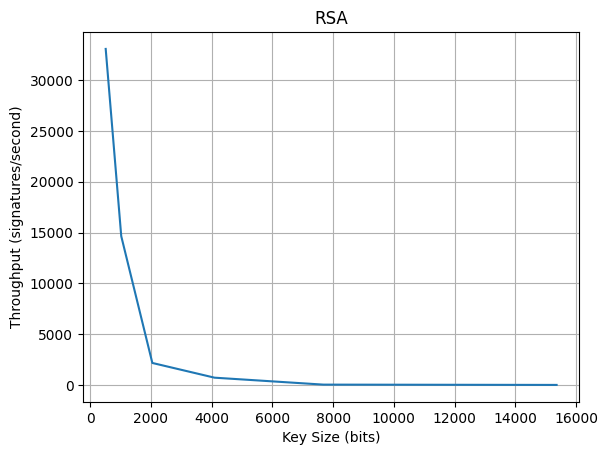

In [27]:
import numpy as np

x = np.array([int(key) for key in data.keys()])
y = np.array([value for value in data.values()])

plt.plot(x, y)
plt.title("RSA")
plt.xlabel("Key Size (bits)")
plt.ylabel("Throughput (signatures/second)")
plt.grid(True)
plt.savefig("RSA.png")

# def plot(data, title, xlabel, ylabel):
#     for key_size, throughput in data.items():
#         print(key_size, throughput)
#         plt.plot(key_size, throughput)

#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.legend()
#     plt.grid(True)
#     plt.savefig(f"{title}.png")

512 33059.6
1024 14639.8
2048 2167
4096 719.2
7680 36
15360 6.8


C:\Users\Ida\AppData\Local\Temp\ipykernel_1980\1937004465.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


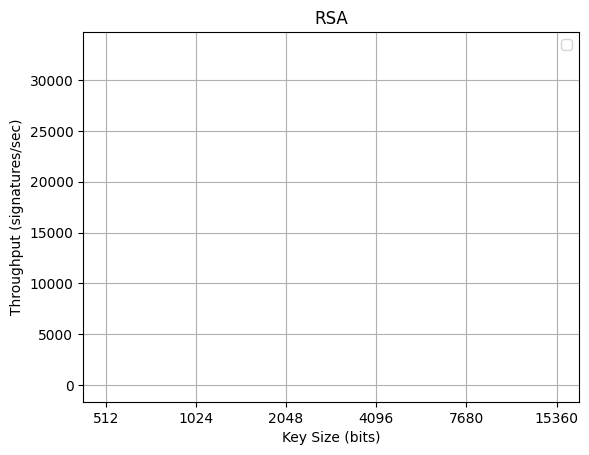

In [22]:
# plot(data, "RSA", "Key Size (bits)", "Throughput (signatures/sec)")